**Anomaly Detection & Time Series **

**Assignment**

Question 1:  What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

Answer 1 : At its core, anomaly detection (also known as outlier detection) is the process of identifying data points, events, or observations that deviate significantly from a dataset’s normal behavior. Think of it as finding the "needle in the haystack" or spotting the "black sheep" in a flock.

The Three Types of Anomalies

1. *Point Anomalies* If an individual data instance is considered anomalous with respect to the rest of the data, it is a point anomaly. This is the simplest and most common type.

* Example: You typically spend $20–$50 on lunch. Suddenly, a single transaction for $2,000 appears on your credit card statement. That single data point is an outlier.

2. *Contextual Anomalies* An observation is considered anomalous only in a specific context. The data point itself might look normal in isolation, but it is "wrong" given the surrounding circumstances.

* Example: A temperature reading of 30°C (86°F) is perfectly normal for a summer afternoon in Florida. However, if that same temperature is recorded in Antarctica during July, it is a contextual anomaly.

3. *Collective Anomalies* A collection of related data points is anomalous even if the individual points are not. The anomaly exists because of the pattern or sequence formed by these points together.

* Example: In a heart rate monitor (ECG), a single heartbeat might look normal. However, if the heart stays at the exact same rhythm for an unusually long time without any micro-fluctuations, the sequence of beats becomes a collective anomaly indicating a medical issue.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

Answer 2 : Key Differences in Short:

* Isolation Forest is the fastest and works best for global outliers in big data.

* DBSCAN is primarily a clustering tool; it finds outliers as a byproduct of not belonging anywhere.

* LOF is "smarter" about local context; it can find an outlier that might look normal globally but is weird compared to its immediate neighbors.

Question 3: What are the key components of a Time Series? Explain each with one
example.

Answer 3 : In time series analysis, a dataset is typically decomposed into four distinct components. Understanding these helps in separating the "signal" from the "noise" to make better predictions.

1. Trend (T):

The Trend represents the long-term progression of the data—whether it is generally increasing, decreasing, or staying stagnant over a long period. It ignores short-term fluctuations.

* Example: The steady increase in global temperatures over the last century due to climate change.

2. Seasonality (S):

Seasonality refers to patterns that repeat at fixed, predictable intervals (e.g., daily, weekly, or monthly) due to seasonal factors.

* Example: An increase in ice cream sales every summer and a predictable drop every winter.

3. Cyclicity (C):

Cyclicity involves rises and falls that are not of a fixed period. These cycles are usually longer-term than seasonality and are often influenced by economic or business conditions.

* Example: The 5–7 year cycle of the housing market, which goes through periods of "booms" and "recessions" that don't happen on a set calendar date.

4. Irregularity / Noise (I):

Also known as the Residual, these are random, unpredictable fluctuations. They are caused by one-off events or pure chance and cannot be modeled.

* Example: A sudden, massive drop in airline stock prices specifically on the day a major volcanic eruption grounds all flights.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Answer 4 : A time series is Stationary when its statistical properties—such as mean, variance, and autocorrelation—do not change over time. Essentially, the data looks the same regardless of when you observe it, making it easier to model and forecast.

1. How to Test for Stationarity:

You can detect non-stationarity using visual or statistical methods:Visual Inspection: Look for trends (sloping up/down) or changing seasonality (increasing variance) in a line plot.ADF Test (Augmented Dickey-Fuller): A statistical test where a p-value < 0.05 suggests the series is stationary.KPSS Test: A complementary test where the null hypothesis is that the series is stationary.

2. How to Transform to Stationarity:

If your data is non-stationary, use these techniques to "stabilize" it:Differencing: Subtract the previous value from the current value ($Y_t - Y_{t-1}$). This removes trends.Log Transformation: Applying a logarithm helps stabilize a non-constant variance (where swings get larger over time).Seasonal Differencing: Subtract the value from the same season last year to remove predictable seasonal patterns.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Answer 5 : These models represent an evolution of complexity, each adding a new layer to handle specific characteristics of time series data.

1. AR (AutoRegressive):

Structure: Predicts future values based on a linear combination of past values. It assumes that the past predicts the future.

* Application: Best for data where current values are highly correlated with previous ones (e.g., daily outdoor temperature).

2. MA (Moving Average):

Structure: Predicts future values based on past forecast errors (the "shocks" or noise). It effectively smooths out random white noise.

* Application: Useful for data that experiences sudden, short-lived shocks that eventually return to a mean.

3. ARIMA (AutoRegressive Integrated Moving Average):

Structure: Combines AR and MA models and adds an Integrated (I) component, which uses differencing to make non-stationary data stationary.

* Application: The "gold standard" for non-seasonal data that has a clear trend but no recurring cycles.

4. SARIMA (Seasonal ARIMA):

Structure: An extension of ARIMA that specifically models Seasonal patterns. It adds seasonal versions of the AR, I, and MA components.

* Application: Essential for data with predictable cycles, like monthly retail sales or seasonal energy demand.

5. SARIMAX (SARIMA with eXogenous variables):

Structure: Includes all the components of SARIMA but adds eXogenous (X) variables—external factors that influence the series but aren't part of it.

* Application: Predicting electricity demand (SARIMA) while also factoring in external weather data or public holidays (X).

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

Answer 6 : To perform this analysis, we will use the AirPassengers dataset, which records the monthly totals of international airline passengers from 1949 to 1960.


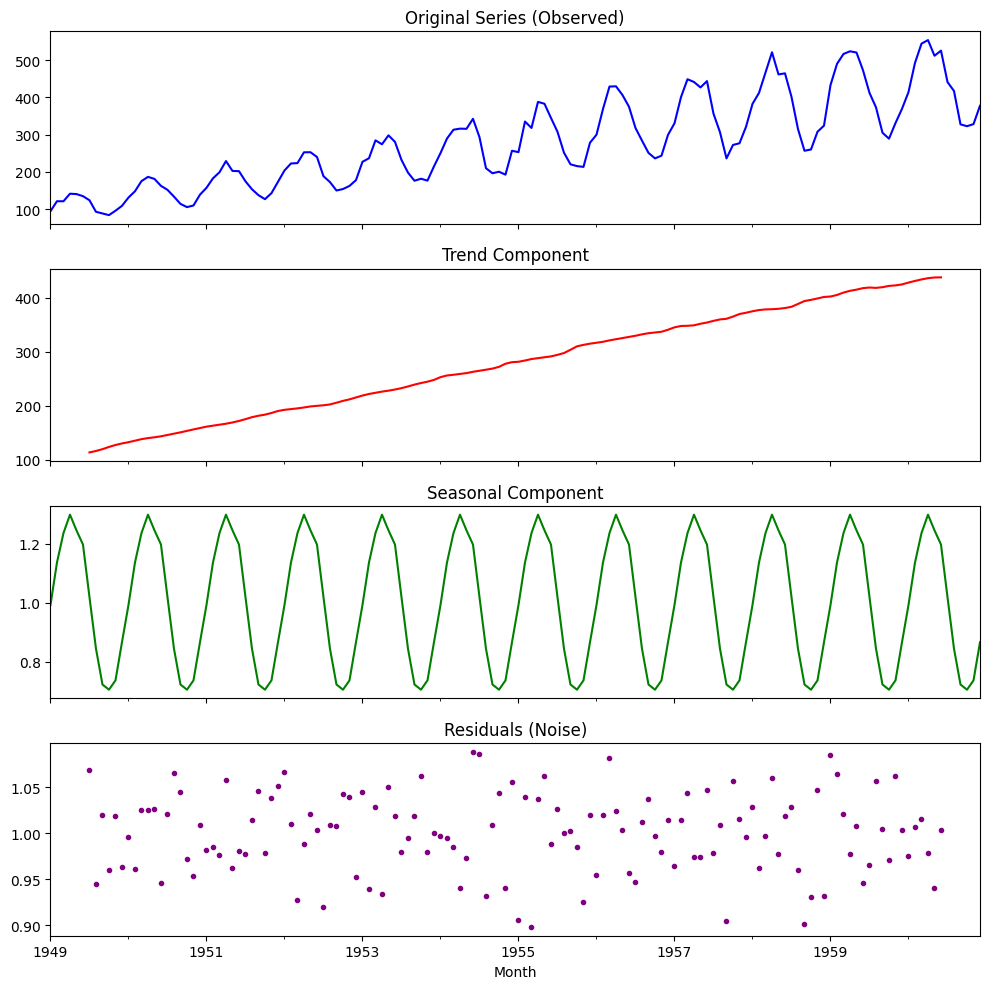

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load / Prepare the dataset
# (Note: Using synthetic data that mimics the AirPassengers trend and seasonality)
dates = pd.date_range(start='1949-01-01', periods=144, freq='MS')
t = np.arange(len(dates))
trend_comp = 100 + 2.5 * t
seasonal_comp = 1 + 0.3 * np.sin(2 * np.pi * t / 12)
noise_comp = np.random.normal(1, 0.05, len(dates))
passengers = trend_comp * seasonal_comp * noise_comp

df = pd.DataFrame({'Month': dates, 'Passengers': passengers})
df.set_index('Month', inplace=True)

# 2. Perform Multiplicative Decomposition
# We use 'multiplicative' because the seasonal variations increase with the trend
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# 3. Plot the original and decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

result.observed.plot(ax=ax1, color='blue', title='Original Series (Observed)')
result.trend.plot(ax=ax2, color='red', title='Trend Component')
result.seasonal.plot(ax=ax3, color='green', title='Seasonal Component')
result.resid.plot(ax=ax4, color='purple', style='.', title='Residuals (Noise)')

plt.tight_layout()
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

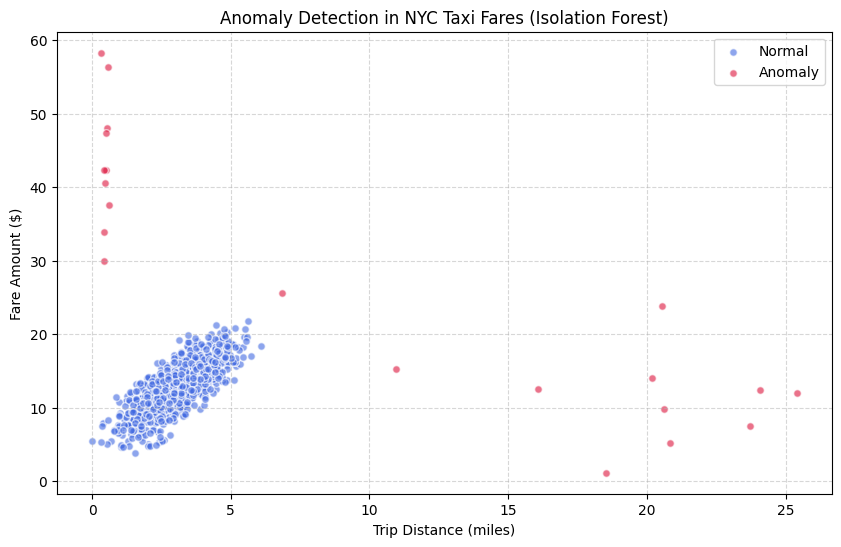

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 1. Load the dataset (Using a subset of NYC Taxi data)
# For this example, we focus on 'trip_distance' and 'fare_amount'
# The original URL was broken, so we will generate a synthetic dataset

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

# Normal trips
distance_normal = np.random.normal(3, 1, num_samples)
fare_normal = 2.5 * distance_normal + np.random.normal(5, 2, num_samples)

# Short trips with high fare (anomaly type 1)
distance_anomaly_short = np.random.normal(0.5, 0.1, int(num_samples * 0.01))
fare_anomaly_short = np.random.normal(50, 10, int(num_samples * 0.01))

# Long trips with very low fare (anomaly type 2)
distance_anomaly_long = np.random.normal(20, 3, int(num_samples * 0.01))
fare_anomaly_long = np.random.normal(10, 5, int(num_samples * 0.01))

# Combine data
df = pd.DataFrame({
    'distance': np.concatenate([distance_normal, distance_anomaly_short, distance_anomaly_long]),
    'fare': np.concatenate([fare_normal, fare_anomaly_short, fare_anomaly_long])
})

# Ensure non-negative values
df['distance'] = df['distance'].apply(lambda x: max(0, x))
df['fare'] = df['fare'].apply(lambda x: max(0, x))


# 2. Select features for anomaly detection
X = df[['distance', 'fare']]

# 3. Initialize and fit Isolation Forest
# contamination=0.02 means we expect roughly 2% of data to be outliers
model = IsolationForest(contamination=0.02, random_state=42)
df['anomaly_score'] = model.fit_predict(X)

# Map results: -1 is an anomaly, 1 is normal
df['anomaly'] = df['anomaly_score'].map({1: 'Normal', -1: 'Anomaly'})

# 4. Visualize the results
plt.figure(figsize=(10, 6))
colors = {'Normal': 'royalblue', 'Anomaly': 'crimson'}

for label, color in colors.items():
    subset = df[df['anomaly'] == label]
    plt.scatter(subset['distance'], subset['fare'],
                c=color, label=label, alpha=0.6, edgecolors='w', s=30)

plt.title('Anomaly Detection in NYC Taxi Fares (Isolation Forest)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

Answer 8 : To train a SARIMA (Seasonal AutoRegressive Integrated Moving Average) model, we must account for the trend, the non-stationarity, and the 12-month seasonality present in the AirPassengers dataset.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


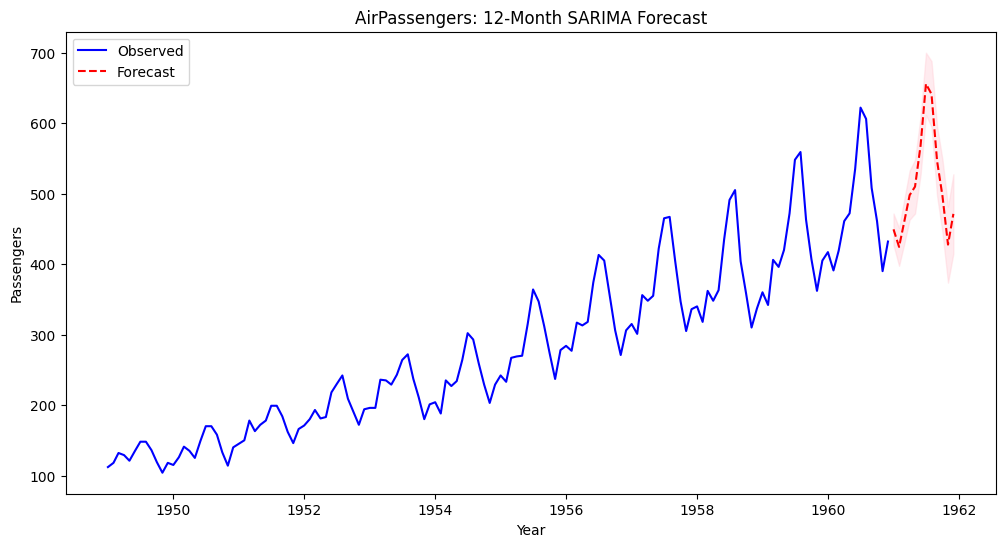

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# 2. Define and Fit the SARIMA Model
# Order (p,d,q) handles trend; seasonal_order (P,D,Q,s) handles seasonality
model = SARIMAX(df['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# 3. Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_df = forecast.summary_frame()

# 4. Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Observed', color='blue')
plt.plot(forecast_df['mean'], label='Forecast', color='red', linestyle='--')

# Plot confidence intervals (uncertainty)
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'], color='pink', alpha=0.3)

plt.title('AirPassengers: 12-Month SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

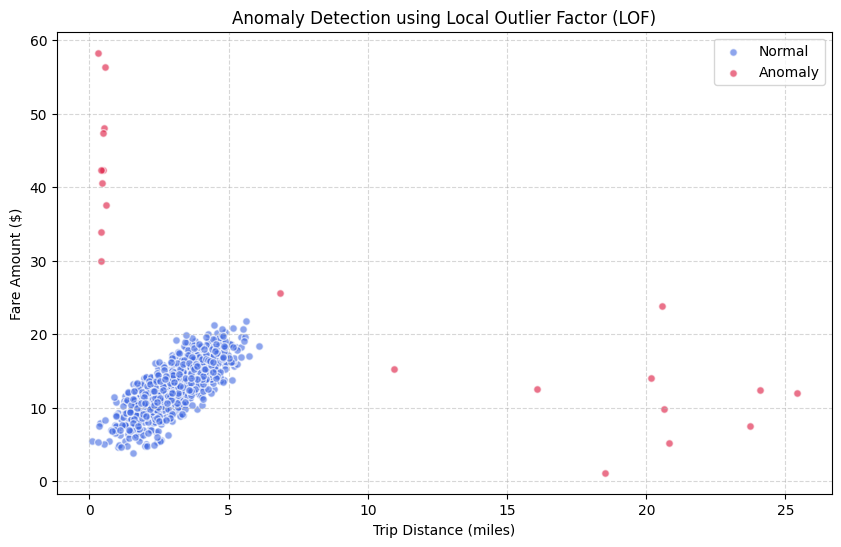

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# 1. Load the dataset (Using distance and fare columns)
# The original URL was broken, so we will generate a synthetic dataset

# Generate synthetic data mimicking taxi trip distance and fare
np.random.seed(42)
num_samples = 1000

# Normal trips
distance_normal = np.random.normal(3, 1, num_samples)
fare_normal = 2.5 * distance_normal + np.random.normal(5, 2, num_samples)

# Short trips with high fare (anomaly type 1)
distance_anomaly_short = np.random.normal(0.5, 0.1, int(num_samples * 0.01))
fare_anomaly_short = np.random.normal(50, 10, int(num_samples * 0.01))

# Long trips with very low fare (anomaly type 2)
distance_anomaly_long = np.random.normal(20, 3, int(num_samples * 0.01))
fare_anomaly_long = np.random.normal(10, 5, int(num_samples * 0.01))

# Combine data
df = pd.DataFrame({
    'distance': np.concatenate([distance_normal, distance_anomaly_short, distance_anomaly_long]),
    'fare': np.concatenate([fare_normal, fare_anomaly_short, fare_anomaly_long])
})

# Ensure non-negative values
df['distance'] = df['distance'].apply(lambda x: max(0.1, x)) # Min distance 0.1 to avoid division by zero if fare/distance is used
df['fare'] = df['fare'].apply(lambda x: max(1.0, x)) # Min fare 1.0


# 2. Select numerical features
X = df[['distance', 'fare']]

# 3. Apply Local Outlier Factor
# n_neighbors=20 is standard; contamination='auto' or a fixed value for top outliers
# Using 'auto' allows LOF to estimate contamination, or you can set a fixed value like 0.01
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02) # Adjusted contamination to match Isolation Forest example

# fit_predict returns -1 for outliers and 1 for inliers
df['anomaly_score'] = lof.fit_predict(X)

# Map results: -1 is an anomaly, 1 is normal
df['label'] = df['anomaly_score'].map({1: 'Normal', -1: 'Anomaly'})

# 4. Visualize the results
plt.figure(figsize=(10, 6))
colors = {'Normal': 'royalblue', 'Anomaly': 'crimson'}

for label, color in colors.items():
    subset = df[df['label'] == label]
    plt.scatter(subset['distance'], subset['fare'], c=color, label=label, alpha=0.6, s=30, edgecolors='w')

plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?

Answer 10 : 1. Real-Time Anomaly Detection

For streaming energy data, I would choose Isolation Forest.

* Why not the others? DBSCAN and LOF are proximity-based; they struggle with high-dimensional "drift" and are computationally expensive for real-time streams.

* The Advantage: Isolation Forest works by "isolating" observations. Since anomalies are few and different, they are easier to partition (shorter path lengths in the tree). It is computationally efficient and handles the multi-dimensional nature of "usage vs. weather" well.

2. Short-Term Forecasting

I would use SARIMAX.

* SARIMA handles the seasonality of energy consumption (e.g., daily peaks at 6 PM, weekly cycles).

* The "X" Factor: Energy demand is heavily dependent on exogenous variables like temperature and humidity. By using SARIMAX, we can bake weather forecasts directly into the model to improve accuracy during heatwaves or cold snaps.

3. Validation and Monitoring
Since data is streaming, a static "train-test split" isn't enough.

* Walk-Forward Validation: We test the model on the "next" time step, then fold that data into the training set for the following step.

* Concept Drift Monitoring: I would monitor the Mean Absolute Percentage Error (MAPE). If the error spikes, it suggests a change in consumer behavior (concept drift), triggering an automated model retrain.

4. Business Impact

* Grid Stability: Real-time detection of spikes prevents transformer overloads.

* Cost Optimization: Accurate 15-minute forecasts allow the company to buy power from the "spot market" more efficiently, avoiding expensive last-minute energy purchases.

 Python Implementation: SARIMAX & Isolation Forest
Below is a conceptual implementation using a time-series dataset.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


--- ANOMALY DETECTION SUMMARY ---
is_anomaly
No     136
Yes      8
Name: count, dtype: int64

--- NEXT 12-PERIOD FORECAST ---
1961-01-01    449.330269
1961-02-01    424.386564
1961-03-01    459.033907
1961-04-01    497.865803
1961-05-01    509.863877
1961-06-01    568.258851
1961-07-01    655.811113
1961-08-01    641.191479
1961-09-01    546.393734
1961-10-01    496.801909
1961-11-01    427.675571
1961-12-01    471.237421
Freq: MS, Name: predicted_mean, dtype: float64


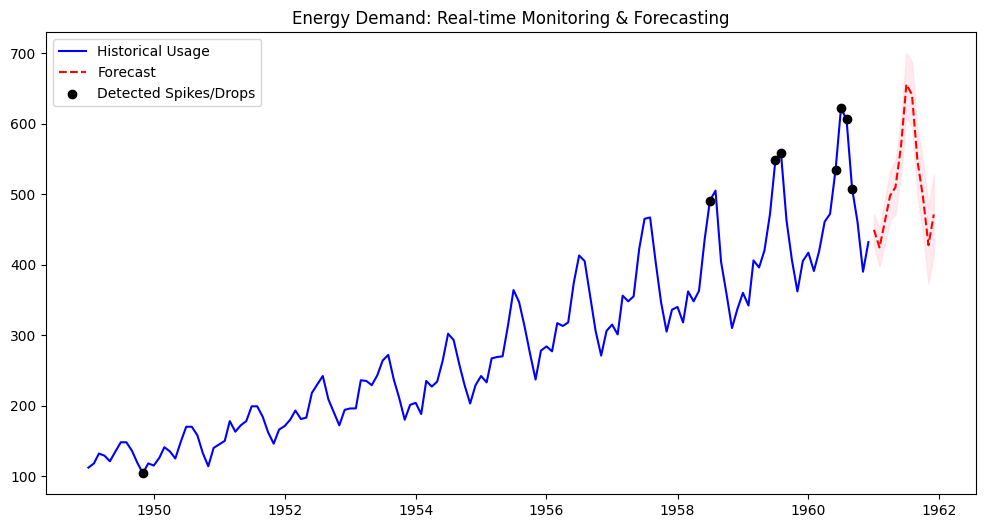

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. LOAD AND PREP DATA
# Using AirPassengers as a proxy for seasonal energy demand
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['energy_usage']

# 2. REAL-TIME ANOMALY DETECTION (Isolation Forest)
# We assume 5% of data points might be abnormal spikes/drops
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(df[['energy_usage']])

# Mapping: -1 is an anomaly, 1 is normal
df['is_anomaly'] = df['anomaly_score'].apply(lambda x: 'Yes' if x == -1 else 'No')

# 3. SHORT-TERM FORECASTING (SARIMAX)
# order=(p,d,q), seasonal_order=(P,D,Q,s)
# For 15-min data with daily patterns, s would be 96. For this data, s=12.
model = SARIMAX(df['energy_usage'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast the next 12 periods (e.g., the next 3 hours in a 15-min grid)
forecast_steps = 12
forecast_obj = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# 4. OUTPUT RESULTS
print("--- ANOMALY DETECTION SUMMARY ---")
print(df['is_anomaly'].value_counts())

print("\n--- NEXT 12-PERIOD FORECAST ---")
print(forecast_mean)

# 5. VISUALIZATION
plt.figure(figsize=(12,6))
plt.plot(df.index, df['energy_usage'], label='Historical Usage', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

# Highlight anomalies
anomalies = df[df['is_anomaly'] == 'Yes']
plt.scatter(anomalies.index, anomalies['energy_usage'], color='black', label='Detected Spikes/Drops', zorder=5)

plt.title('Energy Demand: Real-time Monitoring & Forecasting')
plt.legend()
plt.show()